<a href="https://colab.research.google.com/github/Alexandre77777/computer_math/blob/main/9.%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F%20%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2%20%D0%B8%20%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F%20%D0%A4%D1%83%D1%80%D1%8C%D0%B5/%D0%A1%D0%9A%D0%9C_%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2_%D0%B8_%D1%80%D1%8F%D0%B4%D1%8B_%D0%A4%D1%83%D1%80%D1%8C%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Генерация сигналов и ряды Фурье**


## **1. Генерация сигналов**



Сигналы — это функции, которые изменяются во времени. Они могут быть представлены как колебания (например, звук, свет, электрический ток). В цифровой обработке сигналов (DSP) мы работаем с дискретными сигналами, которые представляют собой набор чисел, соответствующих значениям сигнала в определенные моменты времени.

---

#### **Простая аналогия: волны на воде**
Представьте, что вы бросаете камень в воду. Камень создает круговые волны. Эти волны — аналог синусоидального сигнала. Если вы бросите два камня, волны начнут накладываться друг на друга, создавая более сложный рисунок. Это похоже на сложный сигнал, который состоит из нескольких простых волн.

---

#### **Основные типы сигналов**


1. **Синусоидальный сигнал**  
   Это базовый строительный блок для всех сигналов. Его можно представить как плавное колебание, например, движение качелей.  
   Формула:
   $
   s(t) = A \cdot \sin(2 \pi f t + \phi)
   $
   - $A$: амплитуда (высота волны),
   - $f$: частота (сколько раз волна повторяется за секунду),
   - $\phi$: фаза (смещение волны по времени).

2. **Прямоугольный сигнал**  
   Представьте, что вы включаете и выключаете свет с постоянной частотой. Это пример прямоугольного сигнала. Он резко переключается между двумя уровнями (например, 0 и 1).

3. **Шум**  
   Шум — это случайный сигнал, например, шипение радио, когда вы не настроены на станцию.

4. **Пилообразный сигнал**  
   Это сигнал, который линейно возрастает, а затем резко падает. Его можно представить как движение стрелки часов, которая плавно движется вперед, а затем резко возвращается.

#### **Пример генерации сигналов в Python**


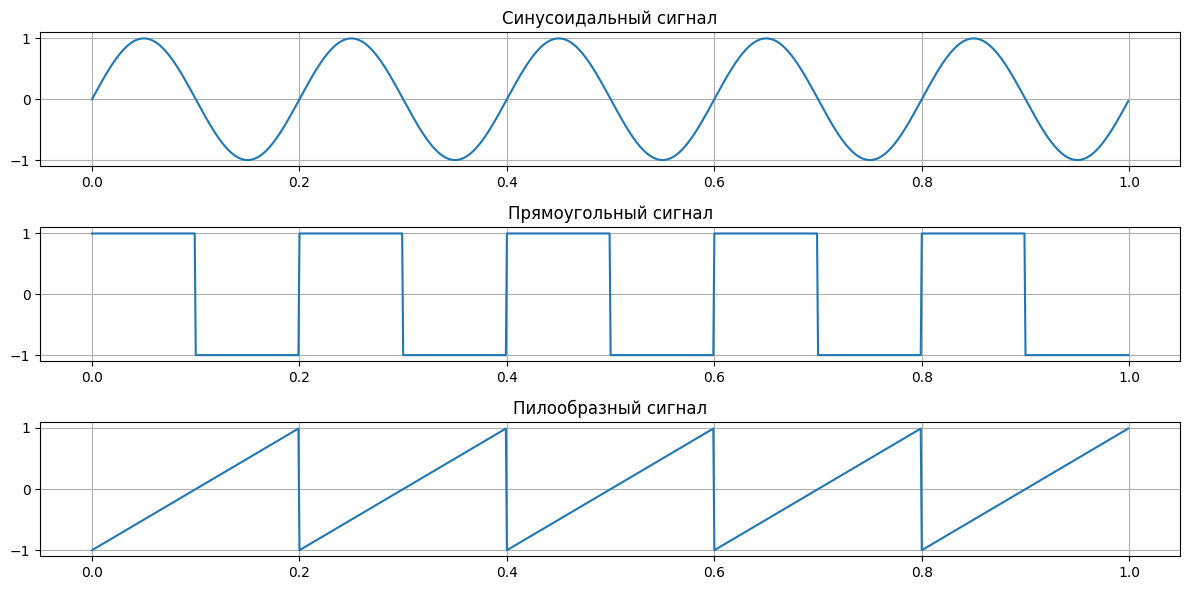

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square, sawtooth

# Параметры
fs = 1000  # Частота дискретизации (Гц)
t = np.linspace(0, 1, fs, endpoint=False)  # Временной вектор (1 секунда)

# Генерация сигналов
sine_wave = np.sin(2 * np.pi * 5 * t)  # Синусоида с частотой 5 Гц
square_wave = square(2 * np.pi * 5 * t)  # Прямоугольный сигнал
sawtooth_wave = sawtooth(2 * np.pi * 5 * t)  # Пилообразный сигнал

# Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, sine_wave)
plt.title("Синусоидальный сигнал")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, square_wave)
plt.title("Прямоугольный сигнал")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, sawtooth_wave)
plt.title("Пилообразный сигнал")
plt.grid()

plt.tight_layout()
plt.show()


## **2. Ряды Фурье**



Ряды Фурье позволяют представить сложный сигнал как сумму простых синусоидальных сигналов. Это похоже на оркестр, где каждая синусоида играет роль отдельного инструмента, а их совместное звучание формирует общее звучание. Каждая синусоида имеет свою частоту, амплитуду и фазу, что позволяет точно описать вклад каждого 'инструмента' в общий сигнал

---

#### **Простая аналогия: пианино**
Представьте, что вы слушаете аккорд на пианино. Этот аккорд состоит из нескольких нот, каждая из которых имеет свою частоту. Ряды Фурье позволяют "услышать" каждую ноту отдельно, даже если они звучат одновременно.

---

#### **Математическое обоснование**


Любой периодический сигнал $f(t)$ можно представить как сумму синусоид:
$
f(t) = a_0 + \sum_{n=1}^{\infty} \left[a_n \cos(2 \pi n f_0 t) + b_n \sin(2 \pi n f_0 t)\right]
$
- $a_0$: среднее значение сигнала,
- $a_n, b_n$: коэффициенты, определяющие вклад каждой гармоники,
- $f_0$: базовая частота (основной тон).

## **3. Преобразование Фурье**


Если сигнал не периодический, используется преобразование Фурье. Оно позволяет перейти от временной области (где сигнал изменяется во времени) к частотной области (где сигнал представлен как набор частот).

---

#### **Простая аналогия: свет**
Когда свет проходит через призму, он раскладывается на спектр цветов. Преобразование Фурье делает то же самое, но для сигналов: оно раскладывает сложный сигнал на его частотные составляющие.

---

#### **Пример преобразования Фурье**


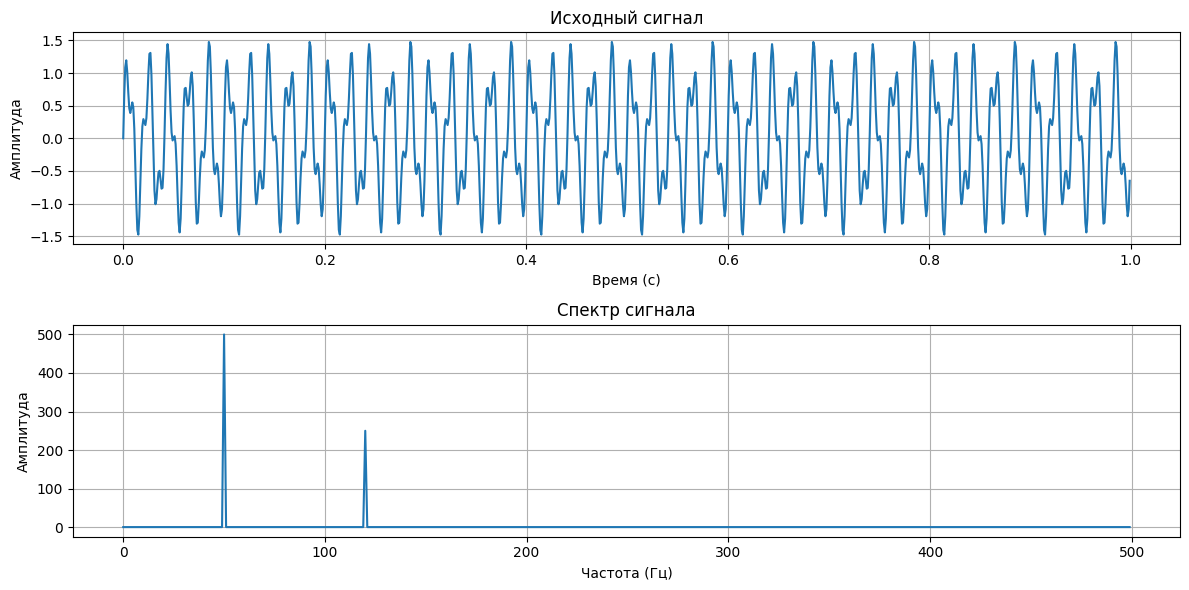

In [2]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Параметры
fs = 1000  # Частота дискретизации (Гц)
t = np.linspace(0, 1, fs, endpoint=False)  # Временной вектор
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)  # Сигнал с двумя частотами

# Преобразование Фурье
fft_result = fft(signal)  # Быстрое преобразование Фурье
frequencies = fftfreq(len(t), 1 / fs)  # Частоты

# Визуализация
plt.figure(figsize=(12, 6))

# Исходный сигнал
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Исходный сигнал")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid()

# Спектр сигнала
plt.subplot(2, 1, 2)
plt.plot(frequencies[:fs // 2], np.abs(fft_result)[:fs // 2])  # Положительные частоты
plt.title("Спектр сигнала")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid()

plt.tight_layout()
plt.show()

#### **Пояснение примера**
1. Мы создали сигнал, состоящий из двух синусоид с частотами 50 Гц и 120 Гц.
2. С помощью `fft` мы преобразовали сигнал в частотную область.
3. На графике спектра видны два пика, соответствующих частотам 50 Гц и 120 Гц.



## **4. Интерпретация результатов**


- **Во временной области**: Сигнал выглядит как сложная волна.
- **В частотной области**: Мы видим, какие частоты присутствуют в сигнале и с какой амплитудой.
